This notebook contains code to train a linear classifier on MNIST. At the end is a short exercise.

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt

import scipy
import scipy.misc
import math
import PIL

import sys
import os
import re
import random
import glob

In [2]:
path = './images/'

sess = None
def ResetSession():
    tf.reset_default_graph()
    global sess
    if sess is not None: sess.close()
    sess = tf.InteractiveSession()
ResetSession()

In [3]:
NUM_CLASSES = 10
NUM_PIXELS = 400 * 400
TRAIN_STEPS = 1000
BATCH_SIZE = 100
LEARNING_RATE = 0.5

TEST_SIZE = 100
TRAIN_SIZE = 1000

MAX_VAL = 255

whole_set = glob.glob(path + '*.png')
random.shuffle(whole_set)
test_set = whole_set[:TEST_SIZE]
train_set = whole_set[TEST_SIZE:TRAIN_SIZE + TEST_SIZE]
whole_set = []

train_labels = []
train_data = []
for i in train_set:
    regex_res = re.search('X([0-9]*\.?[0-9]+)_Y([0-9]*\.?[0-9]+)(_X([0-9]*\.?[0-9]+)_Y([0-9]*\.?[0-9]+))?.png', i)
    
    append_label = np.zeros((NUM_CLASSES), dtype=np.float32)
    x_ind = (int(regex_res.group(1)) - 1) / 40
    np.put(append_label, x_ind, 1)
    train_labels.append(append_label)
    
    img = scipy.misc.imread(i, flatten=False, mode='RGBA').astype(np.float)
    img = img[:,:,3]
    img.shape = (NUM_PIXELS)
    img = img / MAX_VAL
#     print (np.amin(img), np.amax(img))
    train_data.append(img)
#     break
train_tuple = (train_labels, train_data)
print ("done")

done


In [4]:
# mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

# Placeholders for images and labels
# The first dimension is the batch size
# None means it can be of any length
# TensorFlow will infer it later
x = tf.placeholder(tf.float32, [None, NUM_PIXELS], name="pixels")
y_ = tf.placeholder(tf.float32, [None, NUM_CLASSES], name="labels")

# Define the model
W = tf.Variable(tf.truncated_normal(shape=[NUM_PIXELS, NUM_CLASSES], stddev=1.0 / math.sqrt(float(NUM_PIXELS))), name="weights")
b = tf.Variable(tf.truncated_normal(shape=[NUM_CLASSES], stddev=1.0 / math.sqrt(float(NUM_PIXELS))), name="biases")
y = tf.matmul(x, W) + b

# Write a summary of the graph (before we add the loss and optimizer)
# Which will add a bunch of nodes automatically

# Define loss and optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)
tf.summary.scalar('loss', loss)

merged = tf.summary.merge_all()
sw = tf.summary.FileWriter('summaries/', graph=tf.get_default_graph())

# Initialize variables after the model is defined
sess.run(tf.global_variables_initializer())

# Train the model
for i in range(TRAIN_STEPS):
#     random.shuffle(train_tuple)
#     batch_xs, batch_ys = train_tuple[0][:BATCH_SIZE], train_tuple[1][:BATCH_SIZE]
    sum_writer , _ , loss_val = sess.run([merged, train_step, loss], feed_dict={x: train_data, y_: train_labels})
    sw.add_summary(sum_writer, i)
    if i % 100 == 0:
        print (i, "loss %f" % loss_val)
        Weight = sess.run(W)
        for j in range(NUM_CLASSES):
            weight_0 = Weight[:, j]
            weight_0.shape = (400, 400)
            name = './weight_images/it_%d_class_%d.png' % (i, j)
            scipy.misc.imsave(name, weight_0)
#             plt.imshow(weight_0, cmap=plt.cm.gray_r)
            
            

0 loss 2.302732
100 loss 0.038913
200 loss 0.018652
300 loss 0.012245
400 loss 0.009108
500 loss 0.007248
600 loss 0.006018
700 loss 0.005144
800 loss 0.004492
900 loss 0.003986


In [12]:
test_data = []
test_labels = []
for i in test_set:
    regex_res = re.search('X([0-9]*\.?[0-9]+)_Y([0-9]*\.?[0-9]+)(_X([0-9]*\.?[0-9]+)_Y([0-9]*\.?[0-9]+))?.png', i)
    
    append_label = np.zeros((NUM_CLASSES), dtype=np.float32)
    x_ind = (int(regex_res.group(1)) - 1) / 40
    np.put(append_label, x_ind, 1)
    test_labels.append(append_label)
    
    img = scipy.misc.imread(i, flatten=False, mode='RGBA').astype(np.float)
    img = img[:,:,3]
    img.shape = (NUM_PIXELS)
    img = img / MAX_VAL
#     print (np.amin(img), np.amax(img))
    test_data.append(img)
print ("done")

done


In [13]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("Accuracy %f" % sess.run(accuracy, feed_dict={x: test_data,
                                  y_: test_labels}))

Accuracy 0.910000


In [14]:
print (len(test_labels), len(test_data))

100 100


Predicted: 7, Actual: 7


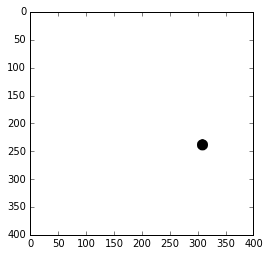

In [16]:
prediction = tf.argmax(y, 1)

def predict(idx):
    image = test_data[idx]
    return sess.run(prediction, feed_dict={x: [image]})

idx = 99
actual = np.argmax(test_labels[idx])
print ("Predicted: %d, Actual: %d" % (predict(idx), actual))
output = (test_data[idx].reshape((400,400)) * 255)
plt.imshow(output, cmap=plt.cm.gray_r)